# Analiza podatkov

V tej datoteki bom analizirala podatke, pridobljene s spletne strani myanimelist.net.

Ne pozabi spisati markdown blokov in README.md datoteke :)

In [1]:
import pandas as pd

pd.set_option("display.max_rows", 10)

%matplotlib inline 

ANIME = pd.read_csv("anime.csv", index_col="id") 
VSI_ANIME = pd.read_csv("vsi_anime.csv", index_col="id")
LIKI = pd.read_csv("liki.csv", index_col="id_lika")

In [2]:
VSI_ANIME

,naslov,število epizod,sezona premiere,leto premiere,vir,dolzina epizode v minutah,ocena,člani,demografika,teme,žanri,studii
id,,,,,,,,,,,,
3579,Getter Robo,51,spring,1974,Manga,25,6.70,8804,Shounen,['Mecha'],"['Action', 'Sci-Fi']",['Toei Animation']
6383,Chargeman Ken!,65,spring,1974,Original,6,4.56,4518,NG,[],"['Action', 'Adventure', 'Sci-Fi']",['Knack Productions']
3388,Majokko Megu-chan,72,spring,1974,Original,25,6.67,4010,NG,['Mahou Shoujo'],[],['Toei Animation']
2836,Chiisana Viking Vickie,78,spring,1974,Novel,24,6.67,3948,Kids,['Historical'],"['Adventure', 'Comedy']",['Nippon Animation']
8139,Shin Minashigo Hutch,26,spring,1974,NaN,24,6.27,1542,NG,[],"['Adventure', 'Comedy', 'Drama']",['Tatsunoko Production']
...,...,...,...,...,...,...,...,...,...,...,...,...
59505,Kankin Kuiki Level X,NG,fall,2024,Web manga,NG,NaN,272,NG,[],"['Horror', 'Mystery']",[]
59499,Asatir 2: Mirai no Mukashi Banashi,NG,fall,2024,Original,NG,NaN,191,NG,[],['Adventure'],[]
58827,Okaimono Panda!,NG,fall,2024,Other,NG,NaN,117,NG,['Anthropomorphic'],[],['Shin-Ei Animation']


Splošno

In [ ]:
# Nekrižane: Ocene po številih zaokroženih, ocene po letih, najboljših nekaj
# Ocene po izvornem, demografika, žanri, najpopularnejše teme, studii, popularnost križana s characterji, demo, žanri. Franšize.
# Kakšni cross-reference-i npr. demografika-žanri-nekaj. Pač nekaj drugega med sabo kot le ocena. Število epizod v franšizi ... (sam zato nimam dost podatkov ...)

In [3]:
print(float(VSI_ANIME["ocena"].mean())) #Kako se neupoštevajo NaN?

6.854301446771755


In [4]:
filter_nan = VSI_ANIME["ocena"].notna()
ocene = VSI_ANIME[filter_nan]
print(sum(filter_nan))
ocene

4631


,naslov,število epizod,sezona premiere,leto premiere,vir,dolzina epizode v minutah,ocena,člani,demografika,teme,žanri,studii
id,,,,,,,,,,,,
3579,Getter Robo,51,spring,1974,Manga,25,6.70,8804,Shounen,['Mecha'],"['Action', 'Sci-Fi']",['Toei Animation']
6383,Chargeman Ken!,65,spring,1974,Original,6,4.56,4518,NG,[],"['Action', 'Adventure', 'Sci-Fi']",['Knack Productions']
3388,Majokko Megu-chan,72,spring,1974,Original,25,6.67,4010,NG,['Mahou Shoujo'],[],['Toei Animation']
2836,Chiisana Viking Vickie,78,spring,1974,Novel,24,6.67,3948,Kids,['Historical'],"['Adventure', 'Comedy']",['Nippon Animation']
8139,Shin Minashigo Hutch,26,spring,1974,NaN,24,6.27,1542,NG,[],"['Adventure', 'Comedy', 'Drama']",['Tatsunoko Production']
...,...,...,...,...,...,...,...,...,...,...,...,...
56189,Grendizer U,NG,summer,2024,Manga,NG,6.05,6030,NG,['Mecha'],"['Action', 'Sci-Fi']",['Gaina']
54730,Kinnikuman: Kanpeki Chоujin Shiso-hen,11,summer,2024,Manga,23,6.59,5896,Shounen,['Combat Sports'],"['Comedy', 'Sports']",['Production I.G']
59010,Yami Shibai 13,NG,summer,2024,Original,NG,5.97,2335,NG,[],"['Avant Garde', 'Horror', 'Supernatural']",['ILCA']


In [5]:
def zaokrozi(x):
    return round(x, 1)

zaokrozena_ocena = ocene["ocena"].apply(zaokrozi)  #Bolj elegantna rešitev?
zaokrozena_ocena

id
3579     6.7
6383     4.6
3388     6.7
2836     6.7
8139     6.3
        ... 
56189    6.0
54730    6.6
59010    6.0
54143    6.6
58926    6.0
Name: ocena, Length: 4631, dtype: float64

In [6]:
podtabela = ocene[["naslov", "leto premiere", "ocena"]].copy()
podtabela["zaokrožena ocena"] = zaokrozena_ocena
podtabela

,naslov,leto premiere,ocena,zaokrožena ocena
id,,,,
3579,Getter Robo,1974,6.70,6.7
6383,Chargeman Ken!,1974,4.56,4.6
3388,Majokko Megu-chan,1974,6.67,6.7
2836,Chiisana Viking Vickie,1974,6.67,6.7
8139,Shin Minashigo Hutch,1974,6.27,6.3
...,...,...,...,...
56189,Grendizer U,2024,6.05,6.0
54730,Kinnikuman: Kanpeki Chоujin Shiso-hen,2024,6.59,6.6
59010,Yami Shibai 13,2024,5.97,6.0


In [7]:
po_ocenah = podtabela.groupby("zaokrožena ocena").size()
po_ocenah

zaokrožena ocena
2.9     1
3.0     1
3.3     4
3.8     3
3.9     2
       ..
8.8    15
8.9     7
9.0     7
9.1     4
9.3     1
Length: 56, dtype: int64

<Axes: title={'center': 'Razporeditev zaokroženih ocen'}, xlabel='zaokrožena ocena', ylabel='število animejev'>

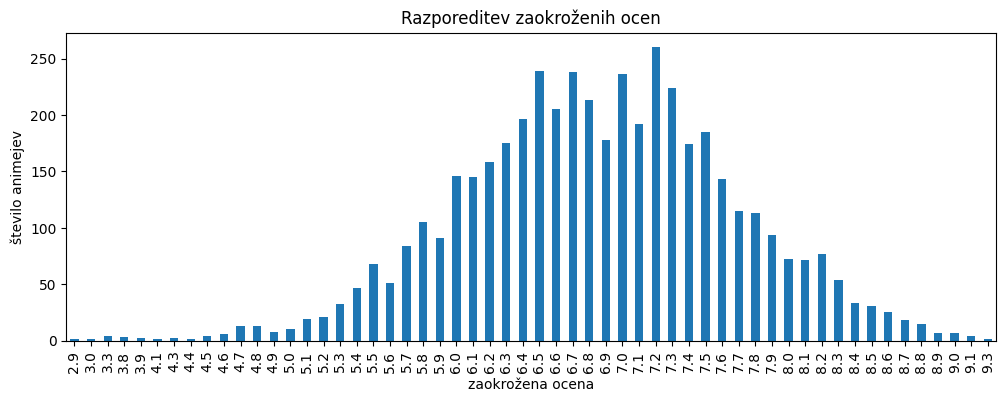

In [13]:
po_ocenah.plot.bar(title="Razporeditev zaokroženih ocen", xlabel= "zaokrožena ocena", ylabel="število animejev", figsize=(12, 4)) #Dam na manj? Na koliko manj?  Ali lahko razširim graf?

<Axes: xlabel='leto premiere'>

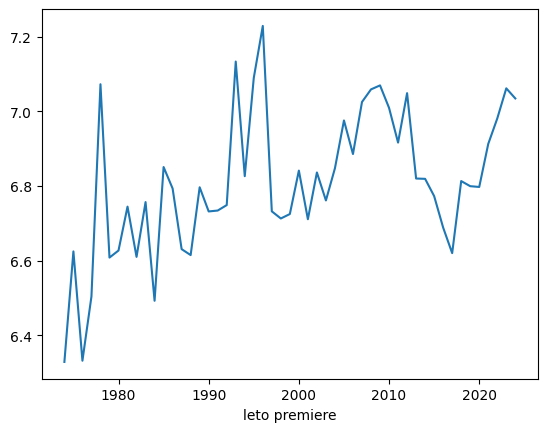

In [14]:
ocene_po_letih = ocene.groupby("leto premiere")["ocena"].mean()
ocene_po_letih.plot()

To je precej zanimivo, razišči še kaj v to smer? Število sploh animejev, memberjev, kaj so takrat dajal ven (demo, teme ...?)

In [ ]:
# Naredi tisti trojni za desetletja/petletja mogoče. Da je število animejev (pobarvano po demografiki), povprečna ocena, memberji, 

<Axes: xlabel='petletja'>

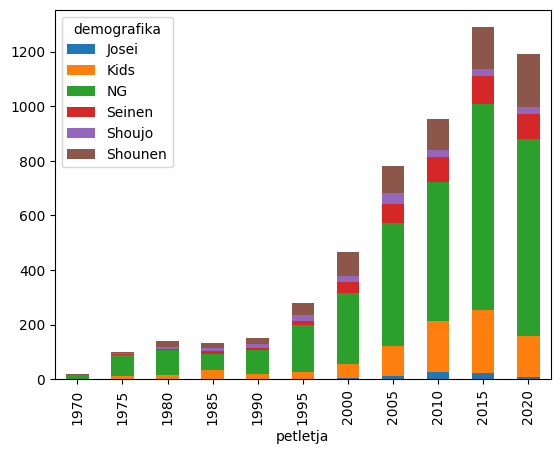

In [34]:
podtabela_po_letih = VSI_ANIME[["naslov", "leto premiere", "ocena", "demografika", "člani", "vir"]].copy()

def petletje(x):
    if x % 10 >= 5:
        return (x // 10) * 10 + 5
    return (x // 10) * 10

podtabela_po_letih["petletja"] = podtabela_po_letih["leto premiere"].apply(petletje)

petletni_podatki = pd.crosstab(
    index = podtabela_po_letih["petletja"],
    columns = podtabela_po_letih["demografika"]
)
petletni_podatki.plot(kind = "bar", stacked = True)

A mi to karkoli pove, glede na to kako veliko je NG stvari? Morda z žanri naredim nekaj podobnega?
Mogla bi se vprašati, kaj bi sploh rada ugotovila.

<Axes: xlabel='demografika'>

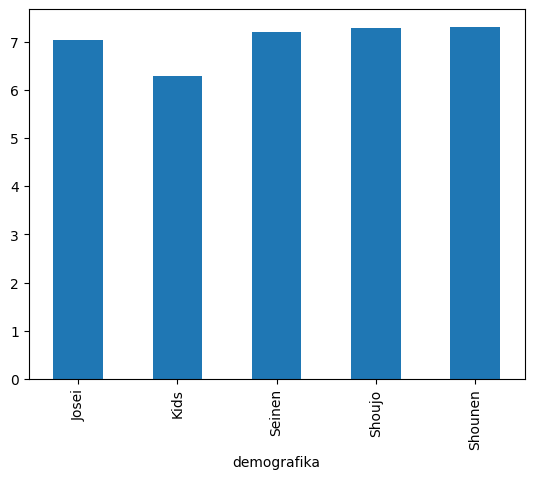

In [35]:
# Povprečna ocena po demografiki
filter_demo = podtabela_po_letih["demografika"] != "NG"
podtabela_demo = podtabela_po_letih[filter_demo]

podtabela_demo.groupby("demografika")["ocena"].mean().plot.bar()

# Zanimivo, da ni razlike v resnici.

<Axes: xlabel='petletja'>

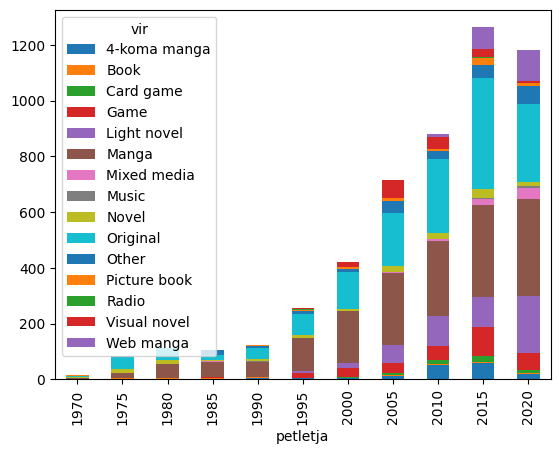

In [41]:
# Kaj pa enake stvari po virih?

petletni_podatki_viri = pd.crosstab(
    index = podtabela_po_letih["petletja"],
    columns = podtabela_po_letih["vir"]
)
petletni_podatki_viri.plot(kind = "bar", stacked = True)

In [44]:
podtabela_po_letih.groupby("vir").size().sort_values()

vir
Radio              5
Music             16
Book              36
Card game         49
Picture book      71
                ... 
Other            235
Game             311
Light novel      512
Original        1490
Manga           1689
Length: 15, dtype: int64

<Axes: xlabel='vir'>

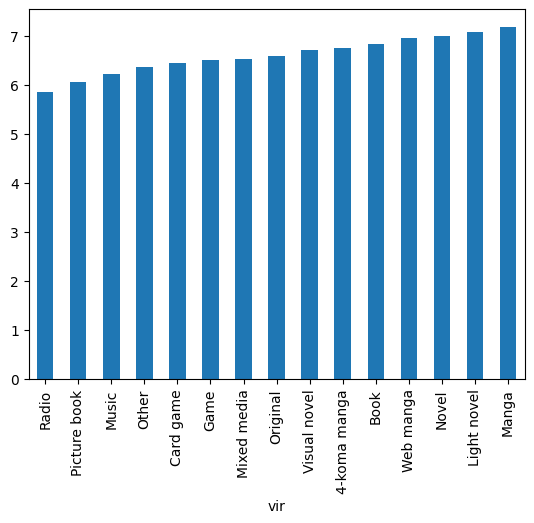

In [43]:
podtabela_po_letih.groupby("vir")["ocena"].mean().sort_values().plot.bar()

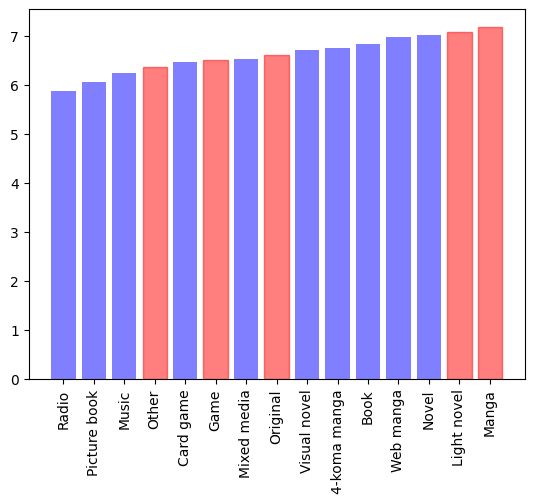

In [85]:
df_viri = pd.DataFrame(podtabela_po_letih["vir"])

df_viri2 = pd.DataFrame({"povpr_o": podtabela_po_letih.groupby("vir")["ocena"].mean().sort_values()})

import matplotlib.pyplot as plt

def plot_color_label(data, target):
    bars = plt.bar(x=data.index, height=data.povpr_o, color='blue', alpha=0.5)
    for idx, word in enumerate(data.index):
        if word in target:
            bars[idx].set_color(c='red')
    plt.xticks(rotation = 90)

popularni_viri = ["Manga", "Original", "Light novel", "Game", "Other"]

plot_color_label(df_viri2, popularni_viri)

             število * 100  člani * 10**7  povprečna ocena
demografika                                               
Josei                 0.78       0.881805         7.030000
Kids                  8.43       0.428274         6.291492
Seinen                4.32       8.938597         7.207146
Shoujo                1.93       3.129173         7.275372
Shounen               7.70      25.345100         7.304505


<Axes: xlabel='demografika'>

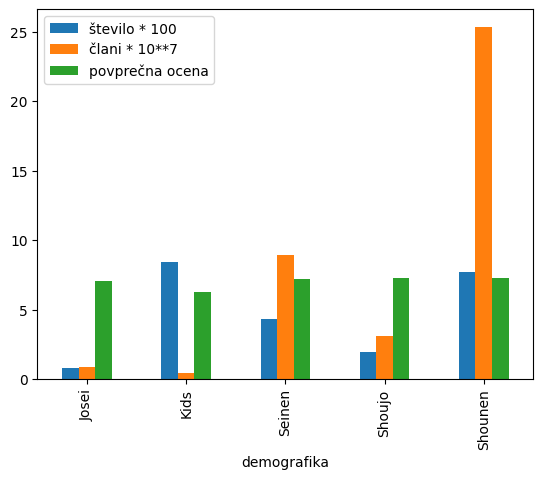

In [129]:
df_demo2 = pd.DataFrame({"število * 100": podtabela_demo.groupby("demografika").size() / 100,
                         "člani * 10**7": podtabela_demo.groupby("demografika")["člani"].sum() / 10000000, 
                         "povprečna ocena": podtabela_demo.groupby("demografika")["ocena"].mean()})

print(df_demo2)

# Razmerje med številom in člani in povprečna ocena in to

df_demo2.plot(kind = "bar", stacked = False)

# Lahko bi naredila v bolj pravih številkah in vrgla ven povprečno oceno, če dam to za tisto, kjer se že vidi približno enaka povprečna ocena.

In [127]:
# Alpa se nardi neke plote različnih barv, pač za vsako to. Za ocene in za popularnost/člane po petletkah. Za sho in sei demografike

filter_josei = podtabela_po_letih["demografika"] == "Josei"
filter_shoujo = podtabela_po_letih["demografika"] == "Shoujo"
filter_seinen = podtabela_po_letih["demografika"] == "Seinen"
filter_shounen = podtabela_po_letih["demografika"] == "Shounen"

podtabela_josei = podtabela_po_letih[filter_josei]
podtabela_shoujo = podtabela_po_letih[filter_shoujo]
podtabela_seinen = podtabela_po_letih[filter_seinen]
podtabela_shounen = podtabela_po_letih[filter_shounen]

df_josei = pd.DataFrame({
    "Josei povprečna ocena": podtabela_josei.groupby("petletja")["ocena"].mean(),
    "Josei število": podtabela_josei.groupby("petletja").size(),
    "Josei člani": podtabela_josei.groupby("petletja")["člani"].sum()
})

print(df_josei)

df_shoujo = pd.DataFrame({
    "Shoujo povprečna ocena": podtabela_shoujo.groupby("petletja")["ocena"].mean(),
    "Shoujo število": podtabela_shoujo.groupby("petletja").size(),
    "Shoujo člani": podtabela_shoujo.groupby("petletja")["člani"].sum()
})

print(df_shoujo)

df_seinen = pd.DataFrame({
    "Seinen povprečna ocena": podtabela_seinen.groupby("petletja")["ocena"].mean(),
    "Seinen število": podtabela_seinen.groupby("petletja").size(),
    "Seinen člani": podtabela_seinen.groupby("petletja")["člani"].sum()
})

print(df_seinen)

df_shounen = pd.DataFrame({
    "Shounen povprečna ocena": podtabela_shounen.groupby("petletja")["ocena"].mean(),
    "Shounen število": podtabela_shounen.groupby("petletja").size(),
    "Shounen člani": podtabela_shounen.groupby("petletja")["člani"].sum()
})

print(df_shounen)


          Josei povprečna ocena  Josei število  Josei člani
petletja                                                   
1995                   6.805000              2        71810
2000                   7.004000              5       115015
2005                   7.458333             12      1663325
2010                   7.114444             27      4312391
2015                   6.753636             22      2103171
2020                   6.935000             10       552337
          Shoujo povprečna ocena  Shoujo število  Shoujo člani
petletja                                                      
1975                    7.395000               4        143671
1980                    6.938889               9         72035
1985                    6.718000              10         37260
1990                    7.276429              14        896969
1995                    7.356818              22       1470162
2000                    7.284091              22       2071989
2005            

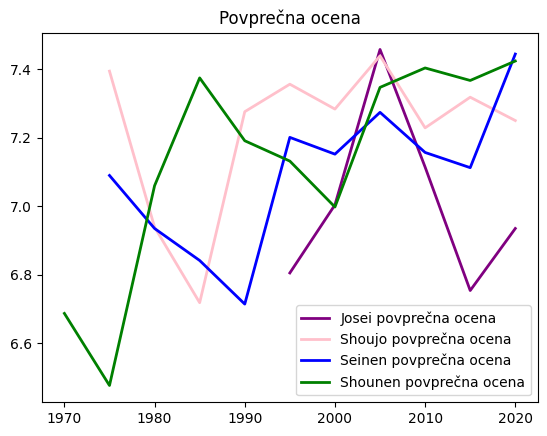

In [126]:
plt.plot(
    df_josei.index, 'Josei povprečna ocena', data=df_josei,
    color='purple',
    linewidth=2
)

plt.plot(
    df_shoujo.index, 'Shoujo povprečna ocena', data=df_shoujo,
    color='pink',
    linewidth=2
)

plt.plot(
    df_seinen.index, 'Seinen povprečna ocena', data=df_seinen,
    color='blue',
    linewidth=2
)

plt.plot(
    df_shounen.index, 'Shounen povprečna ocena', data=df_shounen,
    color='green',
    linewidth=2
)

plt.legend()
plt.title("Povprečna ocena")
plt.show()


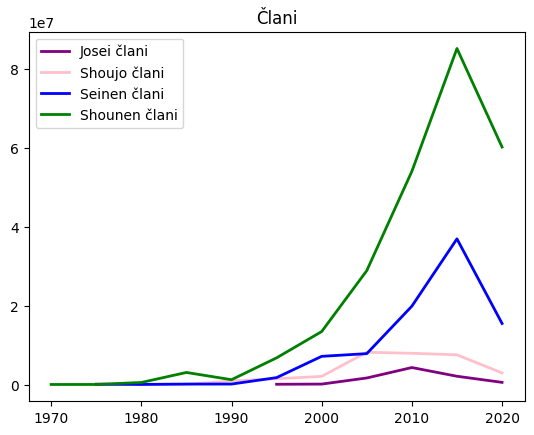

In [128]:
plt.plot(
    df_josei.index, 'Josei člani', data=df_josei,
    color='purple',
    linewidth=2
)

plt.plot(
    df_shoujo.index, 'Shoujo člani', data=df_shoujo,
    color='pink',
    linewidth=2
)

plt.plot(
    df_seinen.index, 'Seinen člani', data=df_seinen,
    color='blue',
    linewidth=2
)

plt.plot(
    df_shounen.index, 'Shounen člani', data=df_shounen,
    color='green',
    linewidth=2
)

plt.legend()
plt.title("Člani")
plt.show()

In [15]:
najboljsi = ocene.sort_values("ocena", ascending=False)
najboljsi.head(10)

,naslov,število epizod,sezona premiere,leto premiere,vir,dolzina epizode v minutah,ocena,člani,demografika,teme,žanri,studii
id,,,,,,,,,,,,
52991,Sousou no Frieren,28,fall,2023,Manga,24,9.34,817774,Shounen,[],"['Adventure', 'Drama', 'Fantasy']",['Madhouse']
5114,Fullmetal Alchemist: Brotherhood,64,spring,2009,Manga,24,9.09,3381374,Shounen,['Military'],"['Action', 'Adventure', 'Drama', 'Fantasy']",['Bones']
9253,Steins;Gate,24,spring,2011,Visual novel,24,9.07,2590030,NG,"['Psychological', 'Time Travel']","['Drama', 'Sci-Fi', 'Suspense']",['White Fox']
28977,Gintama°,51,spring,2015,Manga,24,9.06,638181,Shounen,"['Gag Humor', 'Historical', 'Parody', 'Samurai']","['Action', 'Comedy', 'Sci-Fi']",['Bandai Namco Pictures']
38524,Shingeki no Kyojin Season 3 Part 2,10,spring,2019,Manga,23,9.05,2312316,Shounen,"['Gore', 'Military', 'Survival']","['Action', 'Drama', 'Suspense']",['Wit Studio']
9969,Gintama&#039;,51,spring,2011,Manga,24,9.03,562830,Shounen,"['Gag Humor', 'Historical', 'Parody', 'Samurai']","['Action', 'Comedy', 'Sci-Fi']",['Sunrise']
11061,Hunter x Hunter (2011),148,fall,2011,Manga,23,9.03,2872330,Shounen,[],"['Action', 'Adventure', 'Fantasy']",['Madhouse']
15417,Gintama&#039;: Enchousen,13,fall,2012,Manga,24,9.02,328844,Shounen,"['Gag Humor', 'Historical', 'Parody', 'Samurai']","['Action', 'Comedy', 'Sci-Fi']",['Sunrise']
41467,Bleach: Sennen Kessen-hen,13,fall,2022,Manga,24,9.01,558114,Shounen,[],"['Action', 'Adventure', 'Fantasy']",['Pierrot']


<Axes: xlabel='sezona'>

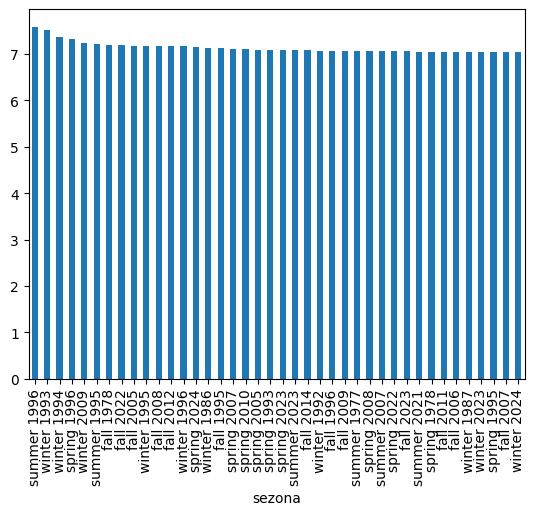

In [143]:
# Naredim za foro še najboljše sezone? Naredim stolpec, kjer je cela sezona (sezona + leto) in pol dataframe z groupbyji (ocena, število naslovov ...) (vsi_anime)
# Sam jih je dvesto. tkoda to bi bla sam tabela, razvrščeno po oceni in pol, kaj je.

podtabela_sezone = VSI_ANIME[["sezona premiere", "leto premiere", "ocena", "člani"]].copy()
podtabela_sezone["sezona"] = podtabela_sezone["sezona premiere"] + ' ' + podtabela_sezone["leto premiere"].apply(str)

podtabela_sezone.groupby("sezona")["ocena"].mean().sort_values(ascending=False).head(40).plot.bar()
# Naredim raje cel un plot in dodam še barve za vse po 2000

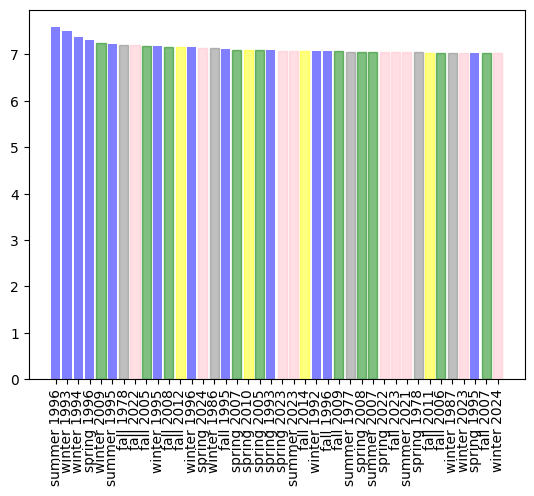

In [152]:
def plot_color_sezone(data):
    bars = plt.bar(x=data.index, height=data.ocena, color='blue', alpha=0.5)
    for idx, sezona in enumerate(data.index):
        sez, leto = sezona.split()
        if int(leto) < 1990:
            bars[idx].set_color(c="grey")
        if 2010 > int(leto) >= 2000:
            bars[idx].set_color(c='green')
        if 2020 > int(leto) >= 2010:
            bars[idx].set_color(c="yellow")
        if int(leto) >= 2020:
            bars[idx].set_color(c="pink")
    plt.xticks(rotation = 90)

df_sezone = pd.DataFrame({
    "ocena": podtabela_sezone.groupby("sezona")["ocena"].mean().sort_values(ascending=False).head(40)
})

plot_color_sezone(df_sezone)

Interpretacija podatkov ?

<Axes: xlabel='člani', ylabel='ocena'>

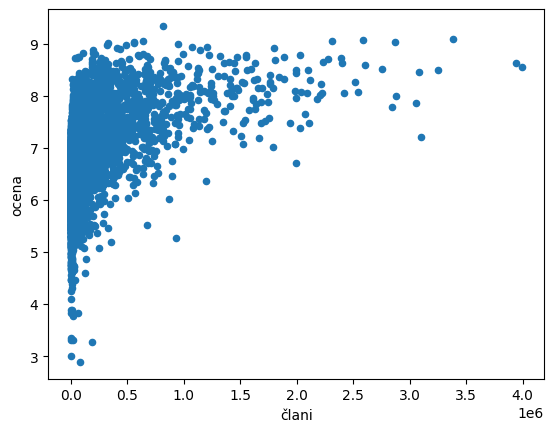

In [154]:
VSI_ANIME.plot.scatter(x="člani", y="ocena") # Kaj mi to pove? :P

<Axes: xlabel='leto premiere', ylabel='ocena'>

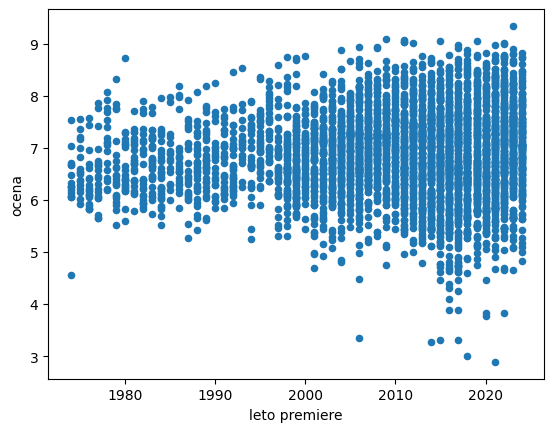

In [155]:
VSI_ANIME.plot.scatter(x="leto premiere", y="ocena")

<Axes: xlabel='leto premiere', ylabel='člani'>

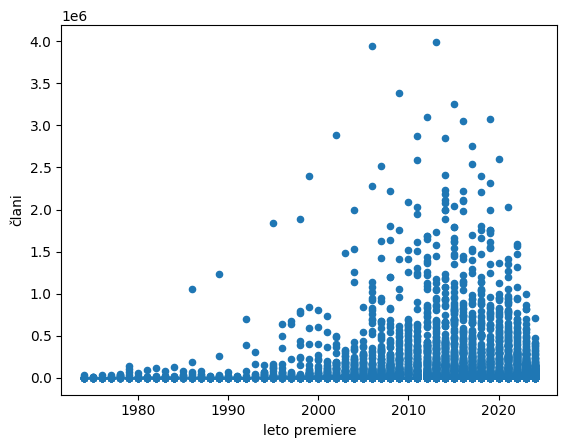

In [158]:
VSI_ANIME.plot.scatter(x="leto premiere", y="člani")

In [ ]:
# Nekje potem sepravi criss cross z žanri, demografikami, popularnostjo, oceno, DOLŽINO (sicer bo to treba s franšizami ...) - franšize so z anime.csv, ostalo bi šlo z vsi_anime.csv
# Studii, oznake ... česa še nimam ? 
# Ali se lahko brez dodatne csv tabel, tukaj v ipynb naredi slovar franšiz, kjer se dodeljuje pač indekse franšizam in so notri vsi id-ji iz related entries.
# Oziroma se doda stolpec z id_franšize. Kar je ubistvu s povezovalno tabelo lažje ... ?
# Kako bi to naredila? ?!

In [236]:
ZANRI = pd.read_csv("anime_zanri.csv")
ANIME_LIKI = pd.read_csv("anime_liki.csv")
LIKI = pd.read_csv("liki.csv")
ANIME = pd.read_csv("anime.csv")

In [237]:
zanri_anime = pd.merge(ZANRI, VSI_ANIME, left_on="id", right_on="id")

<Axes: xlabel='zanr'>

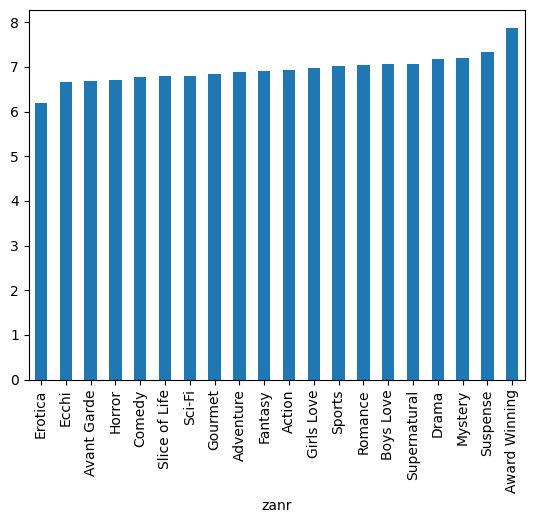

In [238]:
zanri_anime.groupby("zanr")["ocena"].mean().sort_values().plot.bar()  #weird, kaj nej s tem

<Axes: xlabel='zanr'>

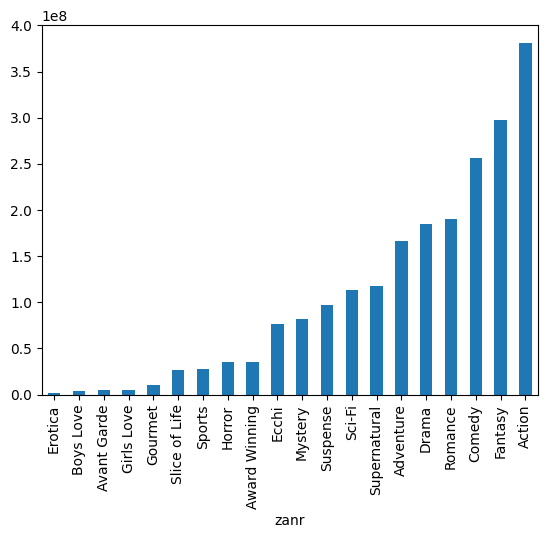

In [239]:
zanri_anime.groupby("zanr")["člani"].sum().sort_values().plot.bar()

<Axes: xlabel='zanr'>

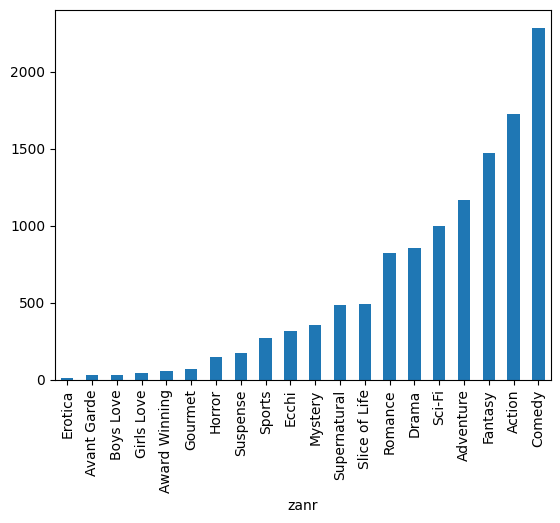

In [240]:
zanri_anime.groupby("zanr").size().sort_values().plot.bar()

               število * 10  člani * 10**6  povprečna ocena
zanr                                                       
Action                172.4     381.313437         6.926864
Adventure             116.8     166.504875         6.880067
Avant Garde             2.8       4.703772         6.680741
Award Winning           5.7      35.527962         7.879643
Boys Love               3.3       3.646838         7.058788
...                     ...            ...              ...
Sci-Fi                100.1     113.053098         6.803589
Slice of Life          49.4      26.751663         6.803505
Sports                 26.9      28.074805         7.013522
Supernatural           48.2     117.759667         7.059219
Suspense               17.2      97.390527         7.336845

[20 rows x 3 columns]


<Axes: xlabel='zanr'>

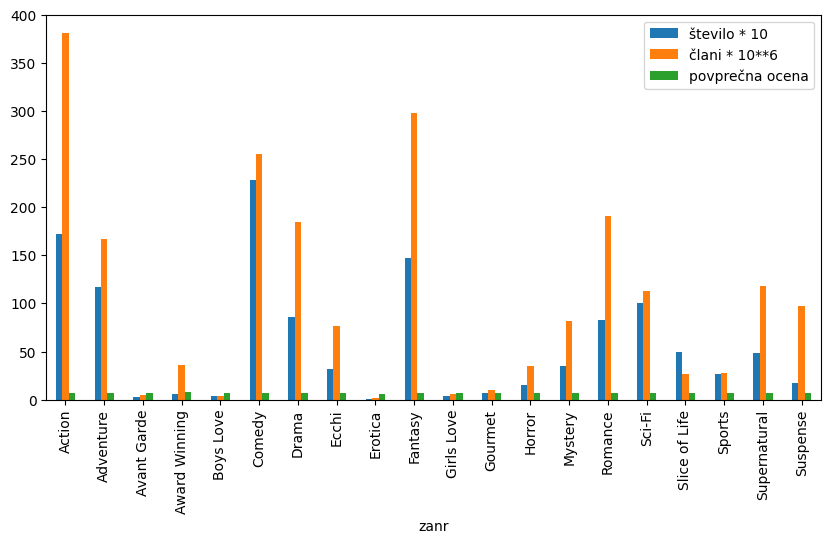

In [241]:
df_zanri = pd.DataFrame({"število * 10": zanri_anime.groupby("zanr").size() / 10,
                         "člani * 10**6": zanri_anime.groupby("zanr")["člani"].sum() / 1000000, 
                         "povprečna ocena": zanri_anime.groupby("zanr")["ocena"].mean()})

print(df_zanri)

df_zanri.plot(kind = "bar", stacked = False, figsize=(10, 5))

<Axes: ylabel='zanr'>

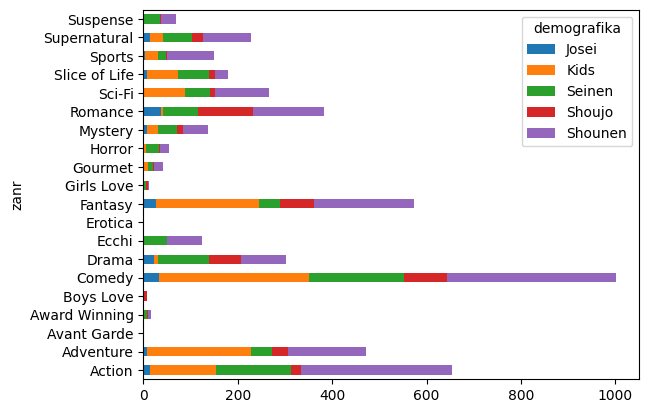

In [242]:
podtabela_zanri_demo = zanri_anime.copy()
podtabela_zanri_demo.drop(index=podtabela_zanri_demo[podtabela_zanri_demo['demografika'] == 'NG'].index, inplace=True)

ct_zanri_demo = pd.crosstab(
    index = podtabela_zanri_demo["zanr"],
    columns = podtabela_zanri_demo["demografika"]
)
ct_zanri_demo.plot(kind = "barh", stacked = True)

<Axes: ylabel='zanr'>

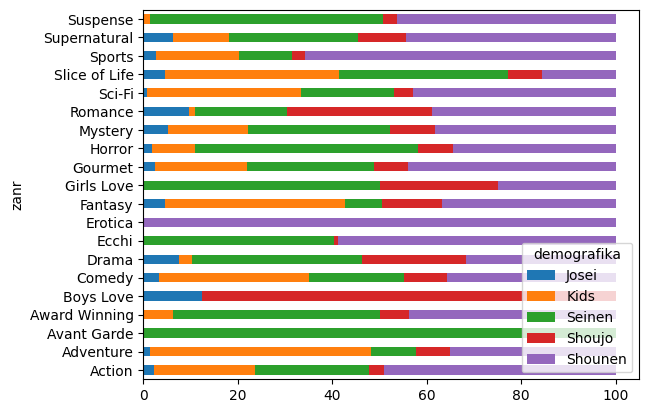

In [243]:
df_zanri_demo = pd.DataFrame(ct_zanri_demo)  #Če zgornje ne potrebuješ, popravi tudi to, da ne bo tako kar nekaj. Naprintaj si vse ct, df in spodnjo, če potrebuješ-

plotdata = df_zanri_demo.div(df_zanri_demo.sum(axis=1), axis=0) * 100 # Še razumi! To je zdaj v procentih pač, sprintaj si, da vidiš (oboje: df in plotdata)

plotdata.plot(kind="barh", stacked="True")

Kaj še lahko naredim z žanri?
Kaj vse lahko naredim s studii?
Franšiz se bom lotila, če bom imela dovolj časa. (?)
Ali lahko studie criss cross z demografikami in žanri in ocenami. Kateri studii so bolj "uspešni" - tisti, ki se ukvarjajo s čim?

<Axes: xlabel='leto premiere', ylabel='zanr'>

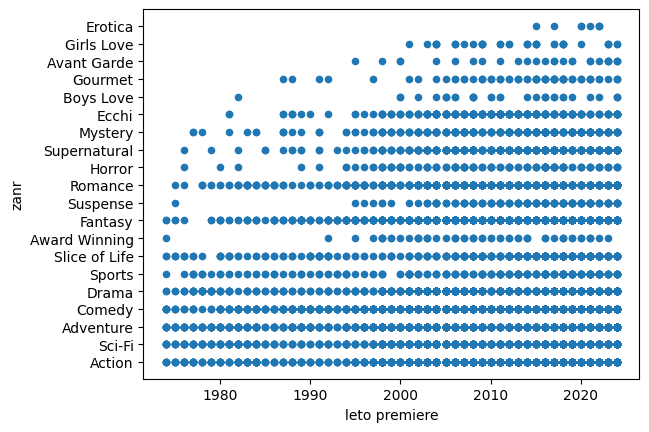

In [245]:
zanri_anime.plot.scatter(x="leto premiere", y="zanr")  # Če bi videl kaj tudi glede na količino ...

In [284]:
filter_studii = zanri_anime["studii"] != "[]"
zanri_studii = zanri_anime[filter_studii]

ct_zanri_studii = pd.crosstab(
    index = zanri_studii["studii"],
    columns = zanri_studii["zanr"]
)
ct_zanri_studii  # Razumi, kaj je crosstab

df_zanri_studii = pd.DataFrame(ct_zanri_studii)
df_zanri_studii["skupna"] = zanri_studii.groupby("studii").size()
df_zanri_studii = df_zanri_studii.sort_values("skupna", ascending=False)
najvecji_studii = df_zanri_studii.head(20)
najvecji_studii

zanr,Action,Adventure,Avant Garde,Award Winning,Boys Love,Comedy,Drama,Ecchi,Erotica,Fantasy,...,Gourmet,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense,skupna
studii,,,,,,,,,,,,,,,,,,,,,
['Toei Animation'],93,70,1,0,1,94,32,2,0,91,...,2,8,15,27,50,11,16,14,2,529
['Sunrise'],112,52,0,9,0,42,40,0,0,27,...,2,1,12,18,108,10,4,7,4,449
['J.C.Staff'],58,40,0,1,4,70,40,22,0,71,...,7,5,13,50,27,8,3,19,7,446
['Studio Deen'],55,34,0,0,11,74,37,11,0,51,...,1,12,20,24,21,14,3,30,7,411
['Madhouse'],58,41,5,6,1,47,54,10,0,36,...,0,10,18,23,36,7,10,20,21,404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
['SILVER LINK.'],17,4,1,0,0,30,4,10,0,20,...,1,1,3,19,5,8,1,8,1,134
['Doga Kobo'],9,3,0,2,0,38,8,6,0,13,...,1,0,4,13,2,7,2,8,0,120
['Satelight'],23,11,0,2,1,13,8,1,0,15,...,0,0,1,11,25,1,1,1,1,115


C:\Users\Uporabnik\AppData\Local\Temp\ipykernel_16752\1824415196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  najvecji_studii.drop('skupna', axis=1, inplace=True)


<Axes: ylabel='studii'>

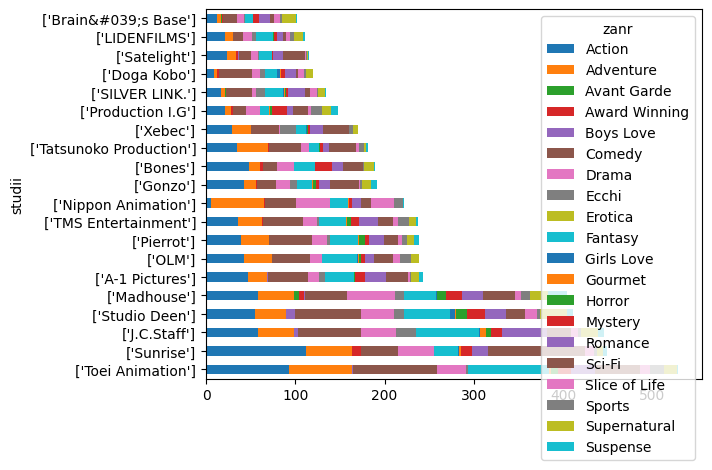

In [285]:
najvecji_studii.drop('skupna', axis=1, inplace=True)
najvecji_studii.plot(kind="barh", stacked=True)

<Axes: ylabel='studii'>

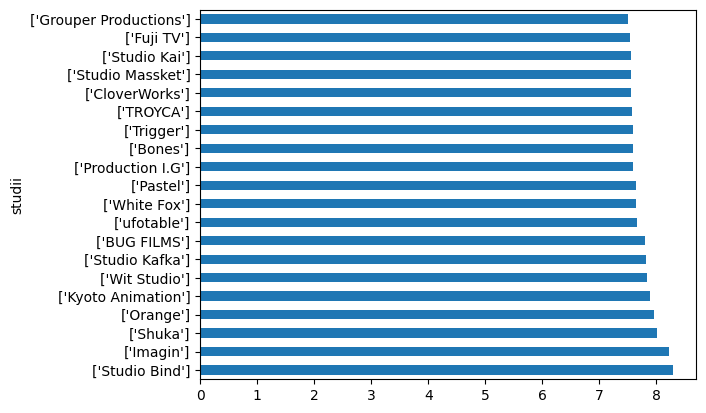

In [287]:
VSI_ANIME.groupby("studii")["ocena"].mean().sort_values(ascending=False).head(20).plot.barh()

Ugotovi, kaj bi rada izvedela.